In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
import sys

%matplotlib inline

In [2]:
sys.path.append("../")
import plotParameters

In [3]:
refractiveIndices = [
    (2.32542 ,1.84214),
    (1.97009 ,1.85093),
    (1.52958 ,1.86146),
    (1.12864 ,1.87327),
    (1.01398 ,1.87807),
    (0.85211 ,1.88758),
    (0.76819 ,1.89479),
    (0.70652 ,1.90181),
    (0.65627 ,1.90916),
    (0.64385 ,1.91127),
    (0.63280 ,1.91327),
    (0.58929 ,1.92245),
    (0.58756 ,1.92286),
    (0.54607 ,1.93429),
    (0.48613 ,1.95800),
    (0.47999 ,1.96112),
    (0.44157 ,1.98526),
    (0.435835,1.98972),
    (0.404656,2.01976)
]
refractiveIndices = np.array(refractiveIndices)

# Convert wavelengths from air to liquid xenon
refractiveIndices[:, 0] /= 1.69

# Convert wavelengths from um to nm
refractiveIndices[:, 0] *= 1000

refInd(185nm) = 2.102809942396481
Parameters: [ 8.84663463e+01  3.67776321e-04 -1.55087042e-07  1.56188271e+00]


/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_2679/493450925.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_fit.show()


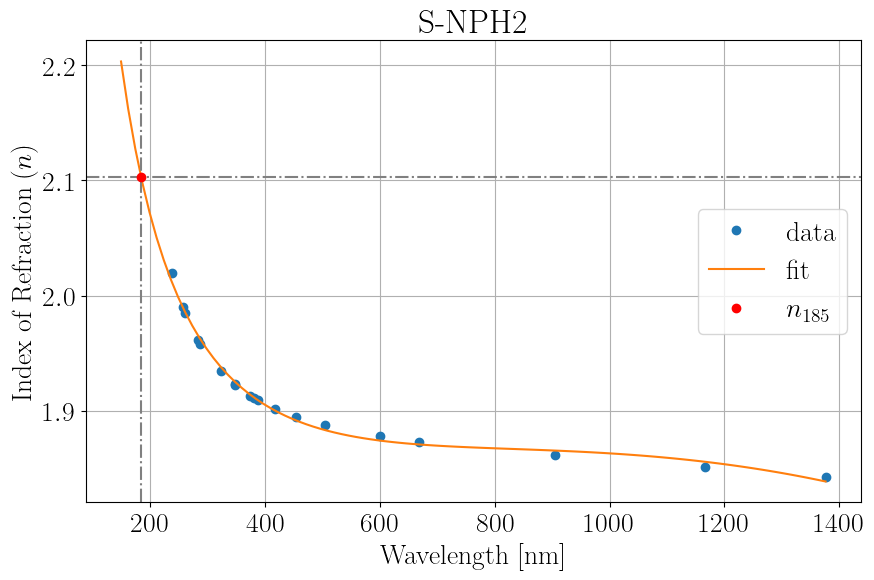

In [5]:
def func(x, a, b, c, d):
    return a * 1/x + b * x + c * x**2 + d

def fit_data(x, y):
    # Define the function to fit the data
    # def func(x, a, b, c):
    #     return a * 1/x + b * x + c
    # def func(x, a, b):
    #     return a * 1/x + b

    # Perform the fit with more points
    x_fit = np.linspace(150, max(x), 100)
    params, _ = opt.curve_fit(func, x, y)
    y_fit = func(x_fit, *params)

    print('refInd(185nm) =', func(185, *params))

    return params, x_fit, y_fit

params, x_fit, y_fit = fit_data(refractiveIndices[:,0], refractiveIndices[:,1])
fig_fit, ax_fit = plt.subplots(figsize=(10, 6))
ax_fit.plot(refractiveIndices[:,0], refractiveIndices[:,1], 'o', label='data')
ax_fit.plot(x_fit, y_fit, '-', label='fit')
ax_fit.axvline(x=185, color='gray', linestyle='-.')
ax_fit.axhline(y=func(185, *params), color='gray', linestyle='-.')
ax_fit.plot(185, func(185, *params), 'ro', label='$n_{185}$')
ax_fit.set_xlabel('Wavelength [nm]')
ax_fit.set_ylabel('Index of Refraction ($n$)')
ax_fit.set_title('S-NPH2')
ax_fit.grid(True)
ax_fit.legend()

fig_fit.savefig('../figures/refractiveIndex.pdf', bbox_inches='tight')
fig_fit.show()

print('Parameters:', params)

energy = 6.974754362888755 eV
wavelength = 177.76144799304217 nm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      4196.99
NDf                       =           23
Edm                       =  1.49736e-09
NCalls                    =           67
Constant                  =       114896   +/-   163.453     
Mean                      =  6.97475e-06   +/-   2.76511e-10 
Sigma                     =  2.30511e-07   +/-   1.88457e-10  	 (limited)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


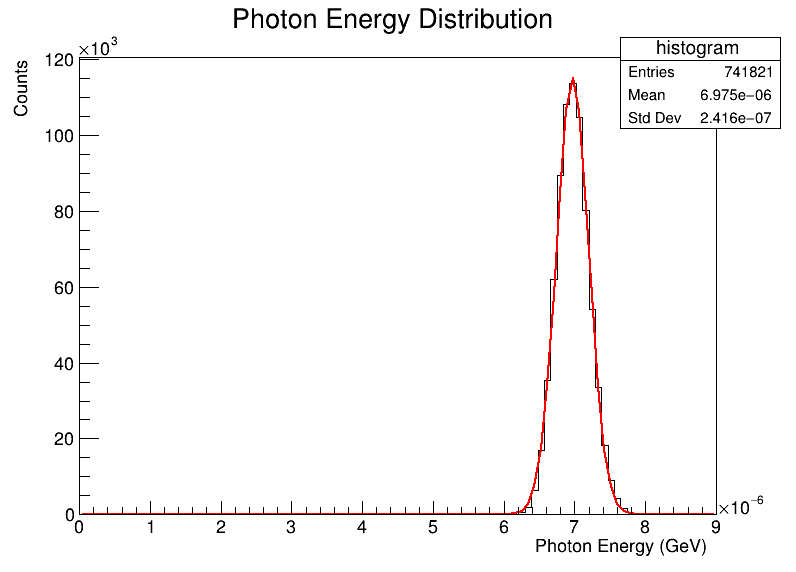

: 

In [27]:
import ROOT

# Open the ROOT file
file = ROOT.TFile.Open("../build/event_2.root")

# Access the tree within the file
tree = file.Get("photon")

# Create a canvas for plotting
canvas = ROOT.TCanvas("canvas", "Photon Energy Plot", 800, 600)

# Draw the histogram from the tree
tree.Draw("photon_energy>>histogram", "photon_energy < 0.001")

# Get the histogram
histogram = ROOT.gDirectory.Get("histogram")

# Customize the histogram if needed
histogram.SetTitle("Photon Energy Distribution")
histogram.GetXaxis().SetTitle("Photon Energy (GeV)")
histogram.GetYaxis().SetTitle("Counts")

# Fit the histogram
histogram.Fit("gaus")
mean = histogram.GetFunction("gaus").GetParameter(1)
h = 4.1356692e-15
c = 2.99792458e8
c_nm = c*1e9
print('energy =', mean*1e6, 'eV')
print('wavelength =', h*c_nm/(mean*1e6), 'nm')

# Draw the histogram on the canvas
histogram.Draw()

# Show the canvas
canvas.Draw()